#### Importing the dependencies

This clustering could be very useful for a business to target their marketing and service offerings more effectively, understanding that different groups may have different needs and responses to marketing campaigns. The centroid of each cluster gives a sense of the average income and spending score of customers within that segment.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [5]:
# loading the data from csv file to a pandas dataframe.
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
# First 5 rows of the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# Finding the number of rows and columns
customer_data.shape

(200, 5)

In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the annual income and the spending score column

In [16]:
X=customer_data.iloc[:,[3,4]].values

In [18]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Now, I am going to choose the number of clusters

WCSS <- Within clusters sum of squares

In [23]:
# elbow method wcss values for different number of clusters
wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=44)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

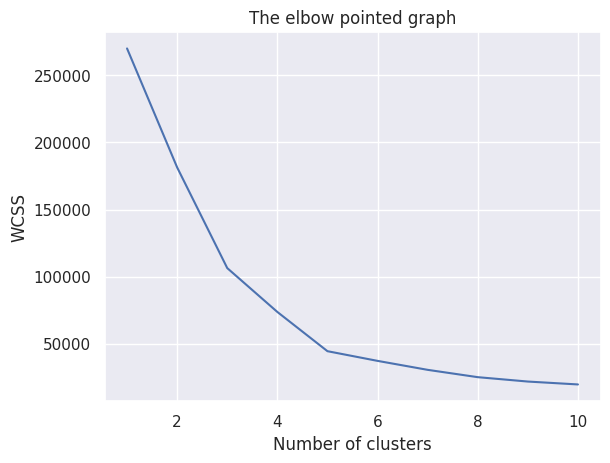

In [24]:
#plot the elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow pointed graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the optimum number of clusters is 5.

Training kmeans clustering model

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing all the clusters
5 clusters = 0,1,2,3,4

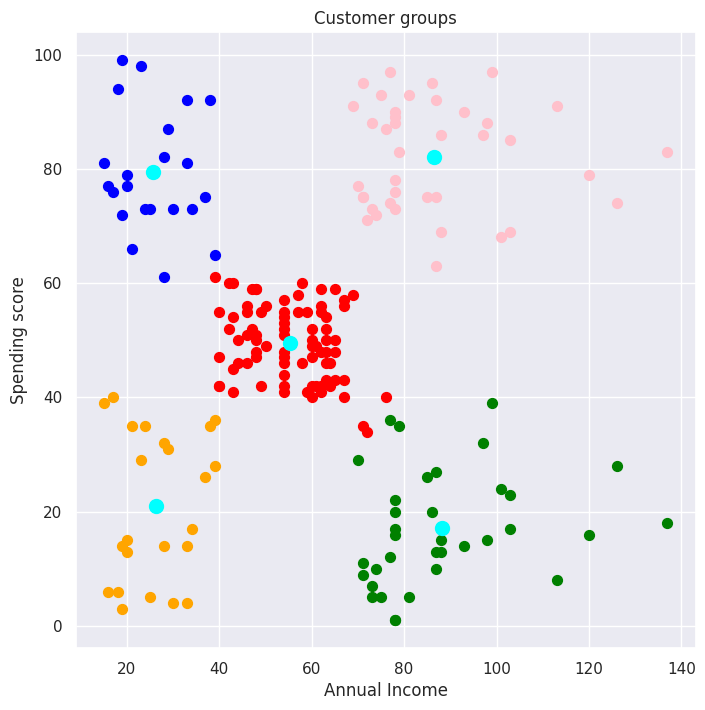

In [36]:
# plotting all the clusters as well as their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='pink',label='cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'cyan', label ='Centroids')
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()


I've created a scatter plot titled "Customer groups," which beautifully displays the results of my customer segmentation analysis based on annual income and spending score. Using K-means clustering, I identified five distinct customer groups within the dataset. I've marked each cluster with a different color: green for cluster 1, red for cluster 2, pink for cluster 3, blue for cluster 4, and orange for cluster 5. The cyan dots represent the centroids of each cluster, which show the average annual income and spending score for each group.

My analysis suggests that cluster 1 (green) consists of customers with high annual incomes and high spending scores, indicating they are likely my premium customer segment. Cluster 2 (red) represents a segment with moderate annual income and moderate spending scores, possibly reflecting a middle-income, cost-conscious group. Cluster 3 (pink) shows customers with high annual incomes but low spending scores, which might be my savings-oriented high earners. Cluster 4 (blue) comprises customers with lower annual incomes but high spending scores, perhaps indicating a group that enjoys spending regardless of their lower income level. Finally, cluster 5 (orange) includes those with low annual income and low spending scores, which might be my budget-conscious or lower-income segment.